In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

#Input file All_plate_diameters.csv has measurements where every other row is colony diameter or clarance diameter, starting with colony diameter. 
#24h: rows 0-7, 48h: rows 8-15, 72h: rows 16-23
#There are four parallels: four colonies and four corresponding clearance zones, in total eight measurements per time point
df = pd.read_csv('All_plate_diameters.csv', sep=';') 
df = df.apply(pd.to_numeric)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_20984\2643904047.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                24h       48h       72h
LCC-ICCG   1.362932  1.881084  2.320381
FsC        1.729995  2.283644  2.848529
FsC-T45P   1.382534  2.113706  2.845793
FsC-L182A  1.315009  1.447986  2.041075
FsC-D83G   1.000000  1.145658  1.203411
FsC-D83N   1.081063  1.106885  1.199290
[[1.36293165 1.88108374 2.32038084]
 [1.72999518 2.28364376 2.84852882]
 [1.38253435 2.11370588 2.84579315]
 [1.31500908 1.44798611 2.04107463]
 [1.         1.14565783 1.20341112]
 [1.08106319 1.10688485 1.19928971]]


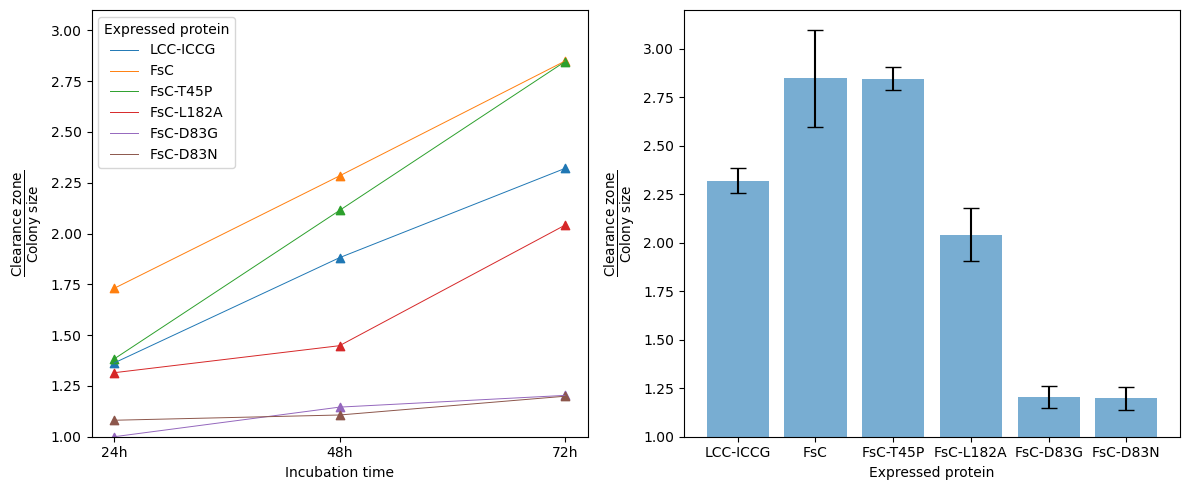

In [13]:
results=pd.DataFrame
ratios=[]
names=[]
errors=[]
for name, values in df.items():
    r=[]
    for v in range(0, len(values), 2):
        colonies = np.array(values[v])
        zones = np.array(values[v+1])
        r.append(zones/colonies) #find ratios

    day1_avg=np.mean(r[0:4])
    day2_avg=np.mean(r[4:8])
    day3_avg=np.mean(r[8:12])
    sem1=np.std(r[0:4])
    sem2=np.std(r[4:8])
    sem3=np.std(r[8:12])
    errors.append(sem3)
    ratios.append([day1_avg, day2_avg, day3_avg])
    names.append(name)

ratios=np.array(ratios)
names=np.array(names)
timepoints=np.array(['24h', '48h', '72h'])
results = pd.DataFrame(ratios, index=names, columns=timepoints)
print(results)
print(ratios)

cmap=sns.color_palette('tab10')
fig, axs = plt.subplots(1,2, figsize=(12, 5))
final_ratios=[] 
for i in range(0, len(ratios)):
    color=cmap[i]
    axs[0].plot(timepoints, ratios[i], lw=0.7, label=names[i], color=color)
    axs[0].scatter(timepoints, ratios[i], marker='^', color=color)
    final_ratios.append(ratios[i][-1]) #a list of ratios at 72h only


axs[1].bar(names, final_ratios, yerr=errors, align='center', alpha=0.6, color=cmap[0], ecolor='black', capsize=6)
axs[1].set_ylabel('$\\frac{\\text{Clearance zone}}{\\text{Colony size}}$', fontsize=14)
axs[1].set_xlabel('Expressed protein')
axs[1].set_ylim(1,3.2)

axs[0].legend(title='Expressed protein')
axs[0].set_ylabel('$\\frac{\\text{Clearance zone}}{\\text{Colony size}}$', fontsize=14)
axs[0].set_xlabel('Incubation time')
axs[0].set_ylim(1,3.1)
plt.tight_layout()
plt.savefig("Quantitative_plate_clearance.png", bbox_inches="tight",
            pad_inches=0.3, dpi=300)
plt.show()

[[1.36293165 1.88108374 2.32038084]
 [1.72999518 2.28364376 2.84852882]
 [1.38253435 2.11370588 2.84579315]
 [1.31500908 1.44798611 2.04107463]
 [1.         1.14565783 1.20341112]
 [1.08106319 1.10688485 1.19928971]]
                24h       48h       72h
LCC-ICCG   1.362932  1.881084  2.320381
FsC        1.729995  2.283644  2.848529
FsC-T45P   1.382534  2.113706  2.845793
FsC-L182A  1.315009  1.447986  2.041075
FsC-D83G   1.000000  1.145658  1.203411
FsC-D83N   1.081063  1.106885  1.199290


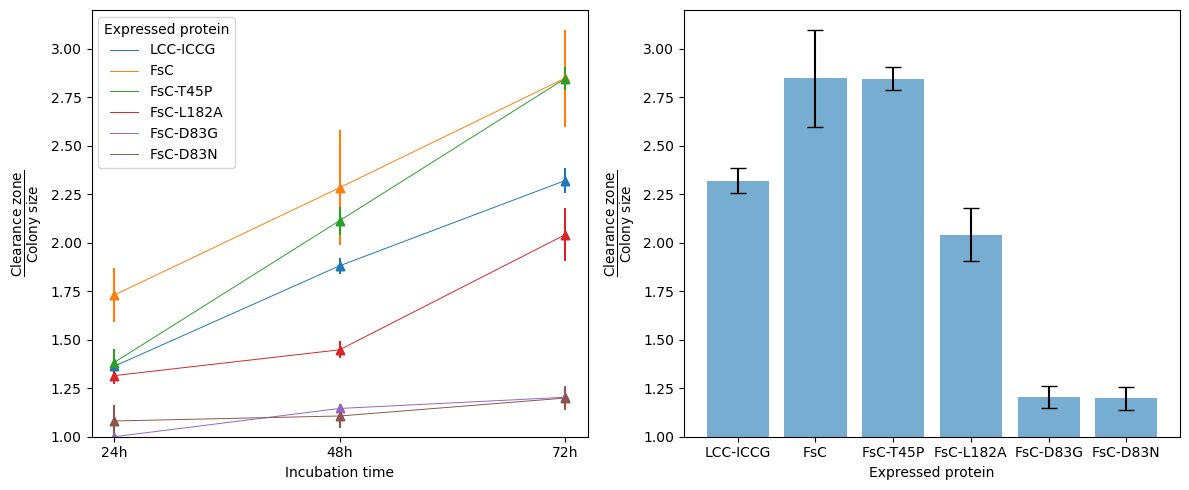

In [21]:
#Same plot, but with errorbars for all timepoints

results=pd.DataFrame
ratios=[]
names=[]
errors1=[]
errors2=[]
errors3=[]
for name, values in df.items():
    r=[]
    for v in range(0, len(values), 2):
        colonies = np.array(values[v])
        zones = np.array(values[v+1])
        r.append(zones/colonies) #find ratios

    day1_avg=np.mean(r[0:4])
    day2_avg=np.mean(r[4:8])
    day3_avg=np.mean(r[8:12])
    sem1=np.std(r[0:4])
    sem2=np.std(r[4:8])
    sem3=np.std(r[8:12])
    sems=[sem1, sem2, sem3]
    errors1.append(sems)
    errors3.append(sem3) #errors at final timepoint
    ratios.append([day1_avg, day2_avg, day3_avg])
    names.append(name)

ratios=np.array(ratios)
print(ratios)
names=np.array(names)
timepoints=np.array(['24h', '48h', '72h'])
results = pd.DataFrame(ratios, index=names, columns=timepoints) 
print(results)

cmap=sns.color_palette('tab10')
fig, axs = plt.subplots(1,2, figsize=(12, 5))
final_ratios=[] 
for i in range(0, len(ratios)):
    color=cmap[i]
    for j, timepoint in enumerate(timepoints):
        # Plot scatter plot with error bars for each time point
        axs[0].errorbar(timepoint, ratios[i][j], yerr=errors1[i][j], fmt='^', color=color)
    axs[0].plot(timepoints, ratios[i], lw=0.7, label=names[i], color=color)
    axs[0].scatter(timepoints, ratios[i], marker='^', color=color)
    #axs[0].errorbar(names, ratios[i], yerr=errors[i], fmt="o", color="r")
    final_ratios.append(ratios[i][-1]) #a list of ratios at 72h only


axs[1].bar(names, final_ratios, yerr=errors3, align='center', alpha=0.6, color=cmap[0], ecolor='black', capsize=6)
axs[1].set_ylabel('$\\frac{\\text{Clearance zone}}{\\text{Colony size}}$', fontsize=14)
axs[1].set_xlabel('Expressed protein')
axs[1].set_ylim(1,3.2)

axs[0].legend(title='Expressed protein')
axs[0].set_ylabel('$\\frac{\\text{Clearance zone}}{\\text{Colony size}}$', fontsize=14)
axs[0].set_xlabel('Incubation time')
axs[0].set_ylim(1,3.2)
plt.tight_layout()
plt.savefig("Quantitative_plate_clearance.png", bbox_inches="tight",
            pad_inches=0.3, dpi=300)
plt.show()